In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Immport the requests log
import requests
requests.__version__

#Import the API Key
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude functions
lats = np.random.uniform(low =-90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and the longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities =[]

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique then we will add it fto the cities list
    if city not in cities:
        cities.append(city)
    
    #Print the city count to confirm the sufficient count.
    len(cities)

In [6]:
len(cities)

584

toliary mg
geraldton au
hobart au
tibati cm
bontang id
toliary mg
east london za
mys shmidta ru
pisco pe
gat ly
grindavik is
mezen ru
nizhneyansk ru
hilo us
glazov ru
busselton au
bluff nz
bengkulu id
kapaa us
khatanga ru
tres de maio br
sulangan ph
sentyabrskiy ru
yumen cn
vaini to
port alfred za
tuktoyaktuk ca
komsomolskiy ru
busselton au
albany au
kruisfontein za
mataura pf
nemuro jp
vestmannaeyjar is
wentzville us
port lincoln au
esperance au
cape town za
geraldton au
namatanai pg
albany au
avarua ck
hinton ca
barentsburg sj
sitka us
muros es
tinsukia in
nikolskoye ru
barrow us
ushuaia ar
san cristobal ec
rikitea pf
bonavista ca
saint-philippe re
chagda ru
barrow us
hermanus za
bluff nz
sorland no
lensk ru
kodiak us
illoqqortoormiut gl
chuy uy
whitehorse ca
torbay ca
touros br
mataura pf
cidreira br
san patricio mx
chingirlau kz
rikitea pf
pisco pe
tilichiki ru
victoria sc
coquimbo cl
rikitea pf
yellowknife ca
puerto ayora ec
jinchang cn
georgetown sh
clyde river ca
punta arenas cl

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]     
            
            # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})
    # If an error is experienced, skip the city

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

ocessing Record 29 of Set 3 | bambous virieux
Processing Record 30 of Set 3 | dikson
Processing Record 31 of Set 3 | makakilo city
Processing Record 32 of Set 3 | esperance
Processing Record 33 of Set 3 | norman wells
Processing Record 34 of Set 3 | iznoski
Processing Record 35 of Set 3 | constitucion
Processing Record 36 of Set 3 | avarua
Processing Record 37 of Set 3 | pangnirtung
Processing Record 38 of Set 3 | vestmannaeyjar
Processing Record 39 of Set 3 | turukhansk
Processing Record 40 of Set 3 | les cayes
Processing Record 41 of Set 3 | deputatskiy
Processing Record 42 of Set 3 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 3 | yambio
Processing Record 44 of Set 3 | talnakh
Processing Record 45 of Set 3 | yuancheng
Processing Record 46 of Set 3 | cottbus
Processing Record 47 of Set 3 | ovsyanka
Processing Record 48 of Set 3 | saint-joseph
Processing Record 49 of Set 3 | kundiawa
Processing Record 50 of Set 3 | boende
Processing Record 1 of Set 4 | ban nah

In [9]:
len(city_data)

539

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Mount Gambier,-37.83,140.77,53.60,93,0,4.70,AU
1,Edd,13.93,41.69,91.06,44,91,1.59,ER
2,Vaini,-21.20,-175.20,77.00,78,75,17.22,TO
3,Oksfjord,70.24,22.35,57.20,67,100,3.36,NO
4,Puerto Ayora,-0.74,-90.35,68.00,92,46,1.01,EC
5,Lavrentiya,65.58,-171.00,45.41,77,12,6.87,RU
6,Riacho De Santana,-13.61,-42.94,67.86,68,65,7.81,BR
7,Bredasdorp,-34.53,20.04,55.40,82,95,20.80,ZA
8,Tailai,46.38,123.40,84.04,46,100,5.30,CN
9,Saint-Georges,12.06,-61.75,78.80,94,75,9.17,GD


In [11]:
new_column_order = ["City","Country","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mount Gambier,AU,-37.83,140.77,53.60,93,0,4.70
1,Edd,ER,13.93,41.69,91.06,44,91,1.59
2,Vaini,TO,-21.20,-175.20,77.00,78,75,17.22
3,Oksfjord,NO,70.24,22.35,57.20,67,100,3.36
4,Puerto Ayora,EC,-0.74,-90.35,68.00,92,46,1.01
...,...,...,...,...,...,...,...,...
534,Barre,US,44.20,-72.50,71.60,68,1,4.70
535,Ures,MX,29.43,-110.40,107.01,24,0,11.01
536,Mangrol,IN,21.12,70.12,83.14,81,97,14.03
537,Boa Vista,BR,2.82,-60.67,77.00,88,20,2.24


In [13]:
#Create the output file
output_data_file = "weather_data/cities.csv"
#Export the df to the output
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [14]:
import time

In [15]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



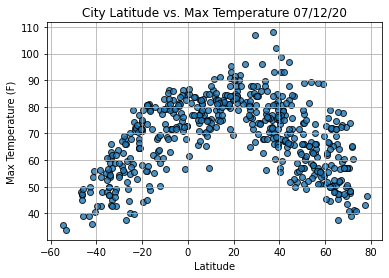

In [16]:
#Build the scatterplot for latitude vs max temperature

plt.scatter(lats,
            max_temps, edgecolor= "black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate other graph properties

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

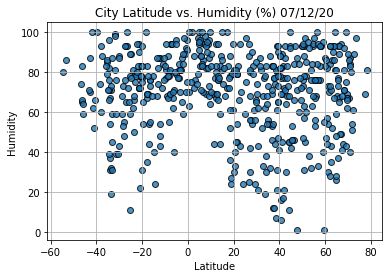

In [17]:
#Build the scatterplot for latitude vs Humidity

plt.scatter(lats,
            humidity, edgecolor= "black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate other graph properties

plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

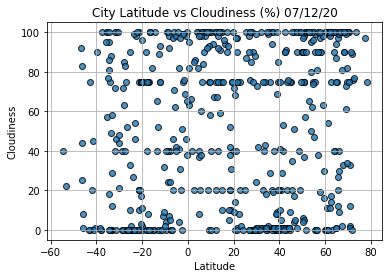

In [18]:
#Build the scatterplot for latitude vs cloudiness

plt.scatter(lats,
            cloudiness, edgecolor= "black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate other graph properties

plt.title(f"City Latitude vs Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

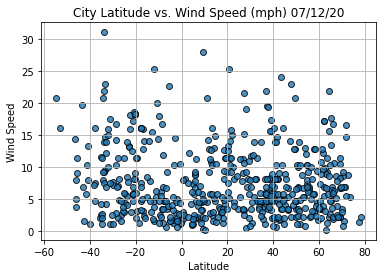

In [19]:
#Build the scatterplot for latitude vs Humidity

plt.scatter(lats,
            wind_speed, edgecolor= "black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate other graph properties

plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
#Import line regression
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data# Create a function to create perform linear regression on the weather data

# and plot a regression line and the equation with the data.  

def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate regression in line "Y values" from the slope and the intercept
    regress_values = x_values * slope + intercept

    #Get the equation for the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Create a scatterplot for the line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    #Annotate the text in the eqaution
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City          Rafaela
Country            AR
Lat            -31.25
Lng            -61.49
Max Temp        48.99
Humidity           39
Cloudiness        100
Wind Speed       1.01
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >=0

0      False
1       True
2      False
3       True
4      False
       ...  
534     True
535     True
536     True
537     True
538    False
Name: Lat, Length: 539, dtype: bool

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

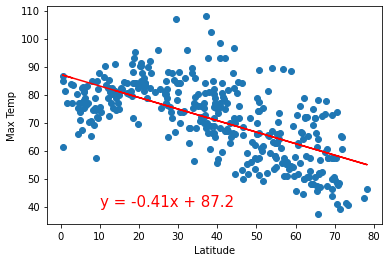

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

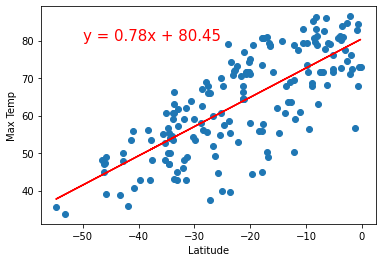

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values,y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

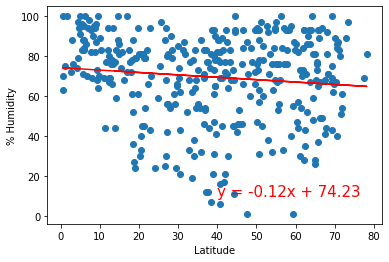

In [27]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values,y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

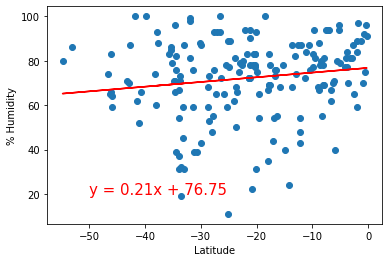

In [28]:
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values,y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,20))

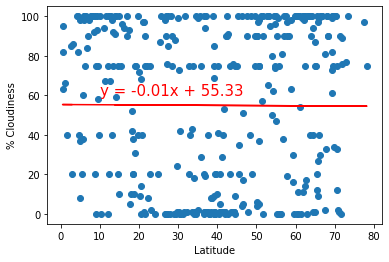

In [29]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Call the function
plot_linear_regression(x_values,y_values, "Linear Regression on the Northern Hemisphere \n for % Cloudiness", '% Cloudiness',(10,60))

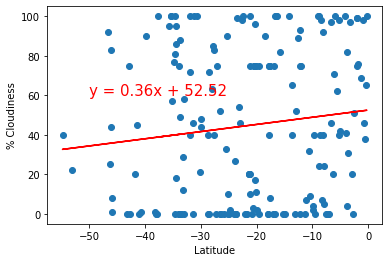

In [30]:
# Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

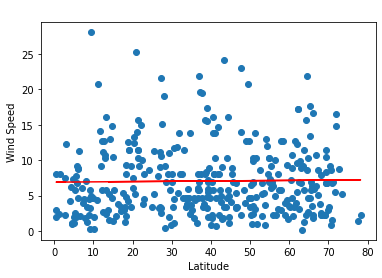

In [31]:
# Linear regression on the Northern Hemisphere for Wind Speed.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

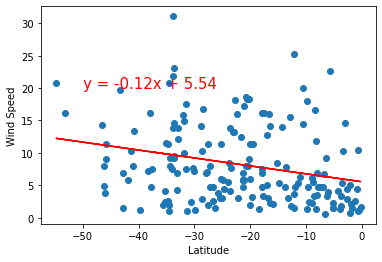

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))